In [2]:
import matplotlib.pyplot as plt

import numpy as np
import astropy as ap
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time

from astroplan import observability_table
from astroplan import AltitudeConstraint, MoonSeparationConstraint, SunSeparationConstraint
from astroplan.plots import plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range
from astroplan.plots import plot_sky

from astroquery.simbad import Simbad

import warnings
warnings.filterwarnings("ignore")

from astroplan import download_IERS_A
download_IERS_A()

In [3]:
CerroParanal = Observer.at_site('Cerro Paranal')
obsDate = Time('2023-5-14')
CerroParanalNoon = CerroParanal.noon(obsDate, which = 'nearest')
obsTime = CerroParanal.tonight(CerroParanalNoon, horizon= -18*u.deg)

In [4]:
result = Simbad.query_criteria('region(CIRCLE, Acrux, 10m)', maintype='*')
del result['RA_PREC'], result['DEC_PREC'], result['COO_ERR_MAJA'], result['COO_ERR_MINA'], result['COO_ERR_ANGLE'], result['COO_QUAL'], result['COO_WAVELENGTH'], result['COO_BIBCODE'], result['SCRIPT_NUMBER_ID']
result

MAIN_ID,RA,DEC
,"""h:m:s""","""d:m:s"""
object,str13,str13
IRAS 12241-6240,12 26 59.4066,-62 56 42.346
TYC 8979-3-1,12 27 55.3052,-63 03 22.176
TYC 8979-1311-1,12 26 42.3346,-62 56 03.771
TYC 8979-366-1,12 25 19.2516,-63 02 50.940
TYC 8979-591-1,12 27 01.9240,-63 01 20.810
TYC 8979-803-1,12 27 30.3552,-63 04 52.258
TYC 8979-1140-1,12 26 04.1333,-63 11 03.065
TYC 8979-1150-1,12 27 05.7063,-63 14 03.127


According to mooncalc.org at Cerro Paranal on May 14th the Moon will be a waning Crescent at 24.5% Brightness and so I don't believe will interfere with the majority of my observations. Some Stars will be invisible due to the moons brightness but not all.

In [5]:
targetList = list()
print(range(len(result['MAIN_ID'])))
for i in range(len(result['MAIN_ID'])):
    target = FixedTarget.from_name(result['MAIN_ID'][i])
    targetList.append(target)

range(0, 49)


In [6]:
constraints = [SunSeparationConstraint(6 * u.hourangle), MoonSeparationConstraint(60 * u.deg), AltitudeConstraint(min=30*u.deg, max = None)]

In [11]:
obsTable = observability_table(constraints, CerroParanal, targetList, time_range = obsTime)
obsTable.sort('fraction of time observable', reverse = True)
obsTable
top10Obs = obsTable[1:10]
top10Obs

target name,ever observable,always observable,fraction of time observable
str28,bool,bool,float64
2MASS J12254547-6304224,True,False,0.7142857142857143
2MASS J12254118-6310015,True,False,0.7142857142857143
2MASS J12254083-6303480,True,False,0.7142857142857143
2MASS J12253497-6302336,True,False,0.7142857142857143
2MASS J12253412-6300112,True,False,0.7142857142857143
2MASS J12252869-6310140,True,False,0.7142857142857143
2MASS J12252423-6311004,True,False,0.7142857142857143
2MASS J12251066-6303587,True,False,0.7142857142857143
2MASS J12261482-6257404,True,False,0.7142857142857143


In [12]:
top10Targets = targetList[0:10]

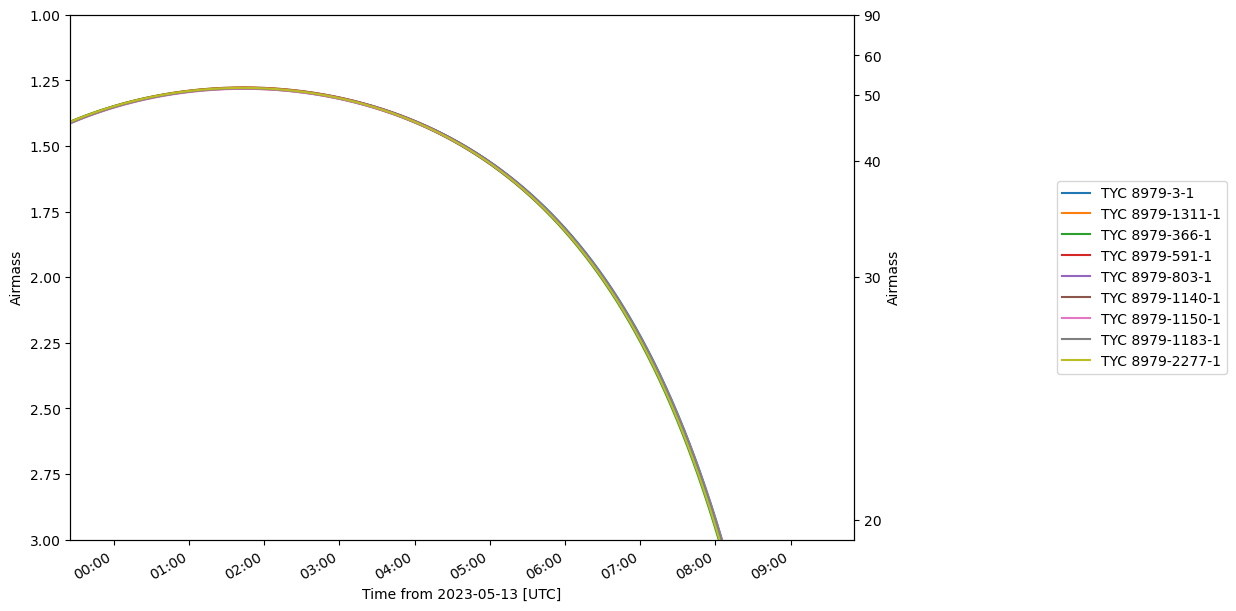

In [13]:
timeGrid = time_grid_from_range(obsTime, time_resolution = 0.01 * u.h)
fig, ax = plt.subplots(
    figsize = (12, 6),
    constrained_layout = True
)

for obj in top10Targets:
    ax = plot_airmass(obj, CerroParanal, timeGrid, altitude_yaxis = True)

plt.legend(loc = 'center left', bbox_to_anchor=(1.25,0.5));

In [9]:
obsDate2 = Time('2023-7-2')
CerroParanalNoon2 = CerroParanal.noon(obsDate2, which = 'nearest')
obsTime2 = CerroParanal.tonight(CerroParanalNoon2, horizon= -18*u.deg)
obsTable = observability_table(constraints, CerroParanal, targetList, time_range = obsTime2)
obsTable.sort('fraction of time observable', reverse = True)
obsTable

target name,ever observable,always observable,fraction of time observable
str28,bool,bool,float64
Gaia DR2 6053796471507883392,False,False,0.0
2MASS J12254547-6304224,False,False,0.0
2MASS J12254118-6310015,False,False,0.0
2MASS J12254083-6303480,False,False,0.0
2MASS J12253497-6302336,False,False,0.0
2MASS J12253412-6300112,False,False,0.0
2MASS J12252869-6310140,False,False,0.0
2MASS J12252423-6311004,False,False,0.0
2MASS J12251066-6303587,False,False,0.0


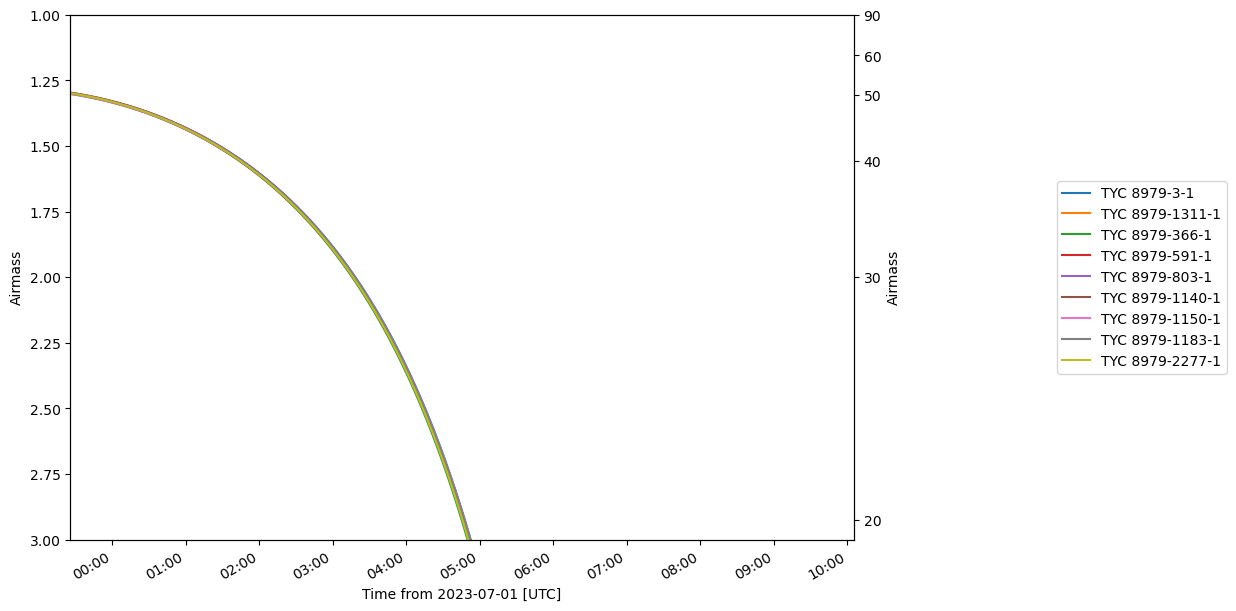

In [16]:
timeGrid2 = time_grid_from_range(obsTime2, time_resolution = 0.01 * u.h)
fig, ax = plt.subplots(
    figsize = (12, 6),
    constrained_layout = True
)

for obj in top10Targets:
    ax = plot_airmass(obj, CerroParanal, timeGrid2, altitude_yaxis = True)
plt.legend(loc = 'center left', bbox_to_anchor=(1.25,0.5));

Exactly 7 weeks later is not optimal at all. The moon becomes basically full at 99.4% full according to MoonCalc.org which now makes the night too bright to observe these stars reasonably.